# P-10:

## 1. Jadeja, Nirav
## 2. Patel, Supriya
## 3. Singh, Abhishek

In [1]:
from Code.DataOperations import DataOperations
from Code.DataVisualization import DataVisualization
from Code.Model import Model

Using TensorFlow backend.


### Now processing the data first: DataOperations.py

### dataset contains comments from various Java based open source projects

In [2]:
dataOperations = DataOperations()
dataVisualization = DataVisualization()
inputFile = dataOperations.loadData("Dataset/technical_debt_dataset.csv")

#dataVisualization.verticalBarGrapgh(inputFile, 'projectname')
dataOperations.debtTypeStats(inputFile, "classification")

Types of Debt and no of comments: 
1. test : 85
2. design : 2703
3. defect : 472
4. documentation : 54
5. implementation : 757
6. without_classification : 58204


### Now, removing irrelevant data: without_classification comments, special characters, stop words. Further, categorizing defect & implementation as 'requirement debt' and all other types to 'others' (except design). At last, saving it as a processed dataset.

In [3]:
processedDataset = dataOperations.filterDataFrame(inputFile, "WITHOUT_CLASSIFICATION")
processedDataset = dataOperations.debtTypeModifications(processedDataset)
processedDataset = dataOperations.removeChracters(processedDataset)

# saving processed dataset
dataOperations.writeCSV(processedDataset, "Dataset/processedDataset")

Writing file finished


### Loading new processed file for further operations

In [4]:
processedFile = dataOperations.loadData("Dataset/processedDataset.csv")

### We will visualize new dataset here

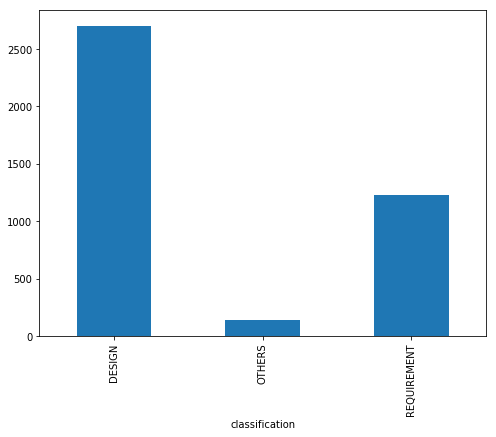

In [5]:
dataVisualization.verticalBarGrapgh(processedFile, 'classification')

### Now, viewing the first 50 most common words for these 2 types of debts and generating word clouds (based on 200 common words).

### For Design debt

In [6]:
mostCommonWords, wordString = dataOperations.certainDebtTypeWords(processedFile, 'DESIGN')

print(mostCommonWords[:50])

[('todo', 1601), ('?', 1056), ('class', 237), ('use', 233), ('need', 216), ('!', 216), ('fixme', 208), ('method', 196), ('return', 179), ('new', 175), ('param', 165), ('used', 157), ('uml', 141), ('name', 140), ('model', 136), ('code', 132), ('get', 130), ('way', 126), ('tfm', 126), ('type', 124), ('needs', 122), ('hack', 121), ('dont', 120), ('set', 119), ('better', 117), ('really', 111), ('element', 110), ('author', 109), ('make', 108), ('create', 106), ('one', 105), ('instance', 102), ('work', 100), ('could', 100), ('see', 100), ('would', 97), ('probably', 97), ('since', 96), ('remove', 89), ('move', 87), ('created', 84), ('object', 83), ('instead', 83), ('may', 83), ('handle', 83), ('check', 82), ('change', 79), ('file', 75), ('add', 74), ('checking', 73)]


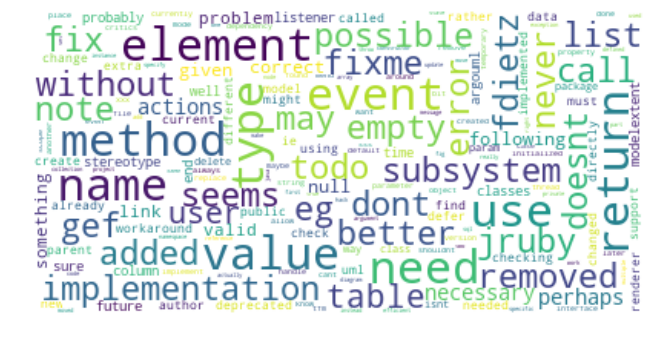

In [7]:
dataVisualization.wordCloud(wordString)

### For Requirement debt

In [8]:
mostCommonWords, wordString = dataOperations.certainDebtTypeWords(processedFile, 'REQUIREMENT')

print(mostCommonWords[:50])

[('todo', 864), ('?', 248), ('dont', 117), ('fixme', 115), ('need', 101), ('!', 87), ('needed', 87), ('require', 78), ('pop', 75), ('work', 70), ('use', 70), ('check', 66), ('add', 60), ('uml', 57), ('param', 51), ('implement', 51), ('return', 48), ('method', 47), ('null', 47), ('new', 43), ('value', 43), ('author', 43), ('make', 42), ('one', 41), ('would', 41), ('tfm', 39), ('implementation', 37), ('may', 36), ('code', 36), ('needs', 36), ('support', 36), ('string', 34), ('yet', 34), ('name', 34), ('really', 33), ('list', 33), ('also', 33), ('set', 32), ('model', 32), ('message', 32), ('see', 31), ('file', 31), ('user', 31), ('doesnt', 30), ('bug', 30), ('implemented', 30), ('get', 29), ('error', 27), ('td', 27), ('case', 27)]


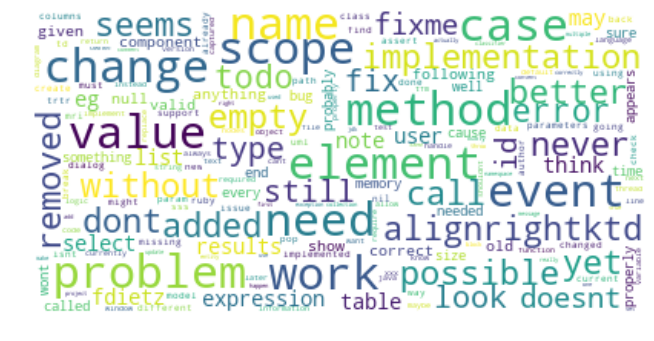

In [9]:
dataVisualization.wordCloud(wordString)

### For Other type

In [10]:
mostCommonWords, wordString = dataOperations.certainDebtTypeWords(processedFile, 'OTHERS')

print(mostCommonWords[:50])

[('todo', 104), ('test', 46), ('?', 33), ('tests', 32), ('param', 22), ('fixme', 20), ('!', 19), ('object', 15), ('needs', 15), ('document', 14), ('string', 14), ('need', 13), ('add', 13), ('name', 13), ('author', 13), ('documentation', 13), ('given', 12), ('function', 12), ('uml', 11), ('return', 11), ('message', 11), ('make', 10), ('use', 10), ('see', 9), ('yet', 9), ('link', 8), ('file', 8), ('supported', 8), ('assert', 8), ('also', 7), ('class', 6), ('doesnt', 6), ('would', 6), ('dont', 6), ('though', 6), ('attribute', 6), ('spec', 6), ('check', 6), ('even', 6), ('events', 6), ('one', 6), ('method', 6), ('remove', 6), ('needed', 5), ('work', 5), ('purpose', 5), ('created', 5), ('attributes', 5), ('sequence', 5), ('model', 5)]


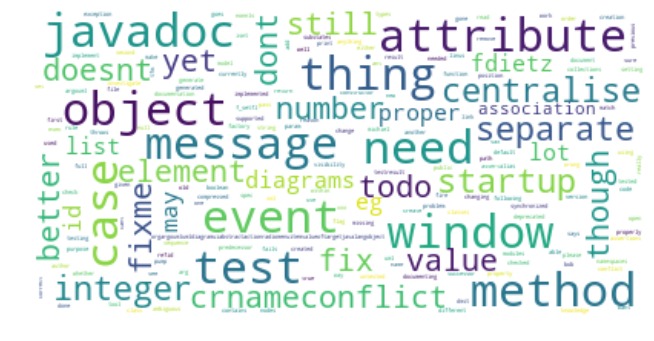

In [11]:
dataVisualization.wordCloud(wordString)

### Creating various model and testing our dataset
### List of models: Logistic Refression, SVC, Linear SVC, Naive Bayes, Perceptron, Ridge Classifier, Neural Network

In [12]:
model = Model(processedFile)

### 1. Logistic Regression:

In [13]:
logisticRegAccuracy, logisticRegF1, logisticRegPrecision, logisticRegRecall  = model.logisticRegression()

Logistic Regression: 
1. Accuracy: 73.077 
2. F1 Score: 0.6560 
3. Precision: 0.6912 
4. Recall: 0.6385


### 2. SVC

In [14]:
svcAccuracy, svcF1, svcPrecision, svcRecall = model.svmSVC()

SVC: 
1. Accuracy: 66.121 
2. F1 Score: 0.2654 
3. Precision: 0.2204 
4. Recall: 0.3333


### 3. Linear SVC

In [15]:
linearSVCAccuracy, linearSVCF1, linearSVCPrecision, linearSVCRecall = model.linearSVC()

Linear SVC: 
1. Accuracy: 76.596 
2. F1 Score: 0.6903 
3. Precision: 0.7612 
4. Recall: 0.6476


### 4. Naive Bayes: 

In [16]:
naiveBayesAccuracy, naiveBayesF1, naiveBayesPrecision, naiveBayesRecall = model.naiveBayes()

Naive Bayes: 
1. Accuracy: 72.095 
2. F1 Score: 0.3926 
3. Precision: 0.5356 
4. Recall: 0.4032


### 5. Perceptron:

In [17]:
perceptronAccuracy, perceptronF1, perceptronPrecision, perceptronRecall = model.perceptron()

Perceptron: : 
1. Accuracy: 75.041 
2. F1 Score: 0.6717 
3. Precision: 0.6950 
4. Recall: 0.6550


### 6. Ridge Classifier: 

In [18]:
ridgeAccuracy, ridgeF1, ridgePrecision, ridgeRecall = model.ridgeClassifierCV()

Ridge Classifier: : 
1. Accuracy: 76.432 
2. F1 Score: 0.6617 
3. Precision: 0.7661 
4. Recall: 0.6115


### 7. Neural Network:

In [19]:
nnHistory, nnAccuracy =  model.neuralNetwork()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Neural Network Accuracy:  76.596 %


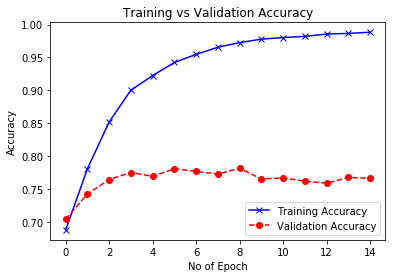

In [20]:
dataVisualization.lineGraph(nnHistory.history['acc'], nnHistory.history['val_acc'])

### Let's view the all accuracy results via graph

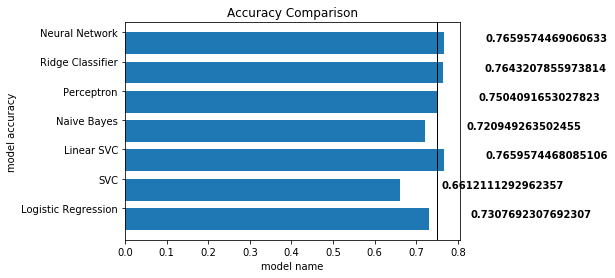

In [21]:
x = ['Logistic Regression', 'SVC', 'Linear SVC', 'Naive Bayes', 'Perceptron', 'Ridge Classifier', 'Neural Network']
y = [logisticRegAccuracy, svcAccuracy, linearSVCAccuracy, naiveBayesAccuracy, perceptronAccuracy, ridgeAccuracy, nnAccuracy]

dataVisualization.horizontalBarGrapgh(x, y)